<a href="https://colab.research.google.com/github/Tamaraawwad/Coursera-Python-for-data-science/blob/main/Data_wrangle_for_Corona_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:

#Write a Python program to display first 5 rows from the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("_Excel Files for Data Analysis Activities.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          62 non-null     datetime64[ns]
 1   cases         62 non-null     float64       
 2   active cases  63 non-null     float64       
 3   deaths        63 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 KB


In [33]:
print(df.isnull().sum())

# Replace missing values with the most appropriate replacement
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'datetime64[ns]':
            # Fill datetime columns with the most recent date (max value)
            df[column] = df[column].fillna(df[column].max())
        else:
            # Fill numerical columns with the median
            df[column].fillna(df[column].median(), inplace=True)

print("Missing Values after handling:\n", df.isnull().sum())

date            2
cases           2
active cases    1
deaths          1
dtype: int64
Missing Values after handling:
 date            0
cases           0
active cases    0
deaths          0
dtype: int64


<ipython-input-33-db3d437df13a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [25]:
df = df.drop_duplicates()
df

,date,cases,active cases,deaths
0,2020-02-15,16.0,13.0,-1.0
1,2020-02-16,16.0,13.0,0.0
2,2020-02-17,13823.5,9.0,0.0
3,2020-02-18,16.0,7.0,0.0
4,2020-02-19,16.0,7.0,28.0
...,...,...,...,...
59,2020-04-14,132210.0,60515.0,3495.0
60,2020-04-15,134753.0,58349.0,3804.0
61,2020-04-16,137698.0,56646.0,4052.0
62,2020-04-17,141397.0,53931.0,4352.0


In [26]:
df['active_case_ratio'] = df['active cases'] / df['cases']
df['death_rate'] = df['deaths'] / df['cases']
df

,date,cases,active cases,deaths,active_case_ratio,death_rate
0,2020-02-15,16.0,13.0,-1.0,0.812500,-0.062500
1,2020-02-16,16.0,13.0,0.0,0.812500,0.000000
2,2020-02-17,13823.5,9.0,0.0,0.000651,0.000000
3,2020-02-18,16.0,7.0,0.0,0.437500,0.000000
4,2020-02-19,16.0,7.0,28.0,0.437500,1.750000
...,...,...,...,...,...,...
59,2020-04-14,132210.0,60515.0,3495.0,0.457719,0.026435
60,2020-04-15,134753.0,58349.0,3804.0,0.433007,0.028229
61,2020-04-16,137698.0,56646.0,4052.0,0.411379,0.029427
62,2020-04-17,141397.0,53931.0,4352.0,0.381415,0.030779


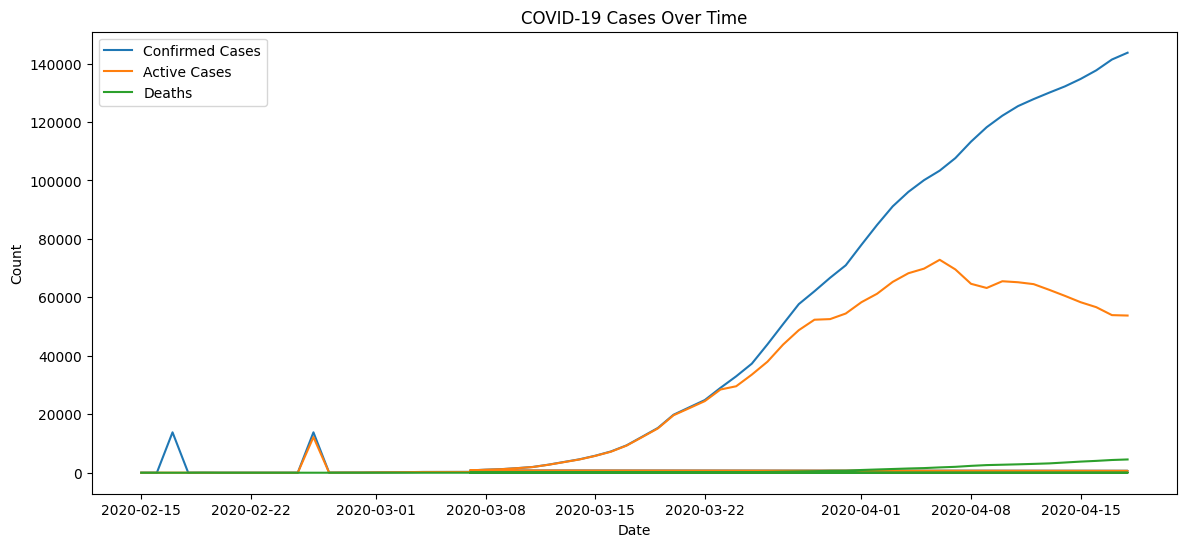

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.plot(df['date'], df['cases'], label='Confirmed Cases')
plt.plot(df['date'], df['active cases'], label='Active Cases')
plt.plot(df['date'], df['deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.show()